# Notebook Summary

### Important notebook as it covers the basics of CNN using Tensorflow.

* It disucsses the way to organize data to use with ImageDataGenerator.

* It covers use of ImageDataGenerator class in keras which helps in a lot of purposes for preprocessing such as normalizing, data and label generation and data augmentation.

* Binary Classification model is created and the results are visualized.

# CNN

##### Using Food 101 dataset for practice. Using only pizza and steak images.

##### The data has been arranged in a structured manner with

        pizza_steak
        |
        |___test
                |_pizza
                |_steak
        |___train
                |_pizza
                |_steak

##### To arrange data in this way see corresponding notebook (Image modification notebook)

##### The zip file for pizza and steak is in Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile

In [ ]:
!unzip gdrive/My\ Drive/Colab\ Notebooks/CNN/pizza_steak.zip

Archive:  gdrive/My Drive/Colab Notebooks/CNN/pizza_steak.zip
   creating: pizza_steak/
  inflating: __MACOSX/._pizza_steak  
  inflating: pizza_steak/.DS_Store   
  inflating: __MACOSX/pizza_steak/._.DS_Store  
   creating: pizza_steak/test/
  inflating: __MACOSX/pizza_steak/._test  
   creating: pizza_steak/train/
  inflating: __MACOSX/pizza_steak/._train  
  inflating: pizza_steak/test/.DS_Store  
  inflating: __MACOSX/pizza_steak/test/._.DS_Store  
   creating: pizza_steak/test/steak/
  inflating: __MACOSX/pizza_steak/test/._steak  
   creating: pizza_steak/test/pizza/
  inflating: __MACOSX/pizza_steak/test/._pizza  
  inflating: pizza_steak/train/.DS_Store  
  inflating: __MACOSX/pizza_steak/train/._.DS_Store  
   creating: pizza_steak/train/steak/
  inflating: __MACOSX/pizza_steak/train/._steak  
   creating: pizza_steak/train/pizza/
  inflating: __MACOSX/pizza_steak/train/._pizza  
  inflating: pizza_steak/test/steak/413497.jpg  
  inflating: pizza_steak/test/steak/2246332.jpg  

##### Inspecting the data

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):

  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


##### The extra file in pizza_steak and test is the ".DR_Store" which can be ignored.

##### Visualizing our images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
class_names = ["pizza","steak"]

# A function to see a random image from the dataset

def view_random_image(target_dir,target_class):

  target_folder = target_dir+target_class

  # Get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # Read and plot image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

['626902.jpg']
Image shape: (512, 384, 3)


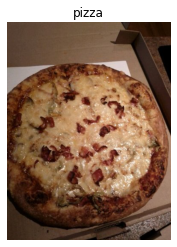

In [ ]:
# Viewing a random image.

img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = "pizza")

##### A major reason to use mpimg was to have the image in the form of an array and then make it a tensor.

In [ ]:
print(img)

[[[ 86  63  47]
  [ 88  65  49]
  [ 89  66  50]
  ...
  [ 36  17   3]
  [ 36  17   3]
  [ 35  16   2]]

 [[ 88  65  49]
  [ 88  65  49]
  [ 88  65  49]
  ...
  [ 38  19   5]
  [ 38  19   5]
  [ 38  19   5]]

 [[ 90  67  51]
  [ 89  66  50]
  [ 88  65  49]
  ...
  [ 40  21   7]
  [ 40  21   7]
  [ 41  22   8]]

 ...

 [[ 56  37  23]
  [ 55  36  22]
  [ 54  35  21]
  ...
  [139 109  98]
  [140 110  99]
  [140 110  99]]

 [[ 54  35  21]
  [ 56  37  23]
  [ 56  37  23]
  ...
  [138 108  97]
  [140 110  99]
  [140 110  99]]

 [[ 51  32  18]
  [ 54  35  21]
  [ 56  37  23]
  ...
  [139 109  98]
  [141 111 100]
  [141 111 100]]]


In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 86,  63,  47],
        [ 88,  65,  49],
        [ 89,  66,  50],
        ...,
        [ 36,  17,   3],
        [ 36,  17,   3],
        [ 35,  16,   2]],

       [[ 88,  65,  49],
        [ 88,  65,  49],
        [ 88,  65,  49],
        ...,
        [ 38,  19,   5],
        [ 38,  19,   5],
        [ 38,  19,   5]],

       [[ 90,  67,  51],
        [ 89,  66,  50],
        [ 88,  65,  49],
        ...,
        [ 40,  21,   7],
        [ 40,  21,   7],
        [ 41,  22,   8]],

       ...,

       [[ 56,  37,  23],
        [ 55,  36,  22],
        [ 54,  35,  21],
        ...,
        [139, 109,  98],
        [140, 110,  99],
        [140, 110,  99]],

       [[ 54,  35,  21],
        [ 56,  37,  23],
        [ 56,  37,  23],
        ...,
        [138, 108,  97],
        [140, 110,  99],
        [140, 110,  99]],

       [[ 51,  32,  18],
        [ 54,  35,  21],
        [ 56,  37,  23],
        ...,
        [139, 109,  9

### An end to end example

Steps:-
* Load the images
* Preprocess the images
* Build a CNN
* Compile
* Fit

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing (scaling/normalization)

train_datagen = ImageDataGenerator(rescale = 1.0/255)
valid_datagen = ImageDataGenerator(rescale = 1.0/255)

# Setup paths of our data directories

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


##### Building a CNN (same as **Tiny VGG architecture**)

In [ ]:
model1 = tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(filters = 10,
                                         kernel_size = 3,
                                         activation = "relu",
                                         input_shape = (224,224,3)),
                                     
                  tf.keras.layers.Conv2D(10,3,activation = "relu"),

                  tf.keras.layers.MaxPool2D(pool_size = 2,
                                            padding = "valid"),
                                     
                  tf.keras.layers.Conv2D(10,3,activation = "relu"),

                  tf.keras.layers.Conv2D(10,3,activation = "relu"),

                  tf.keras.layers.MaxPool2D(2),

                  tf.keras.layers.Flatten(),

                  tf.keras.layers.Dense(1,activation = "sigmoid")
])

##### Compiling

In [ ]:
model1.compile(loss = "binary_crossentropy",
               optimizer = "Adam",
               metrics = ["accuracy"])

##### Fitting

In [ ]:
# Flow from directory automatically creates data and labels so we dont need to give both x and y to fit.

# steps per epoch is used to put in batches so that memory doesnt run out.

history = model1.fit(train_data,
                     epochs = 5,
                     steps_per_epoch = len(train_data),
                     validation_data = valid_data,
                     validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5663 - accuracy: 0.6980 - val_loss: 0.3887 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4130 - accuracy: 0.8127 - val_loss: 0.3435 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3729 - accuracy: 0.8487 - val_loss: 0.3038 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3495 - accuracy: 0.8433 - val_loss: 0.3319 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3102 - accuracy: 0.8727 - val_loss: 0.2983 - val_accuracy: 0.8800


In [ ]:
# Model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

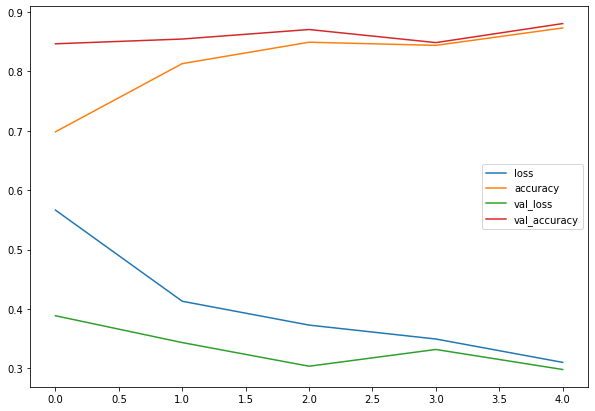

In [ ]:
# Plotting loss and accuracy curves for train and validation data

import pandas as pd

import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize = (10,7))

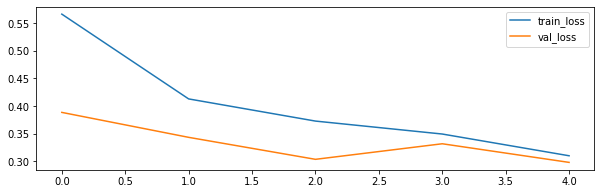

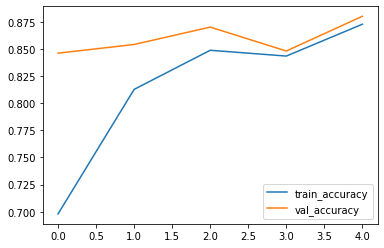

In [ ]:
# Plotting seperately

train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

no_of_epochs = range(len(history.history["loss"]))

plt.figure(figsize = (10,3))

plt.plot(no_of_epochs,train_loss,label = "train_loss")
plt.plot(no_of_epochs,val_loss,label = "val_loss")
plt.legend()

plt.figure()

plt.plot(no_of_epochs,train_accuracy,label = "train_accuracy")
plt.plot(no_of_epochs,val_accuracy,label = "val_accuracy")
plt.legend()